In [2]:
import os
import shutil
import numpy as np
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint

**Copy File monilia from others dataset**

In [3]:
#copy file
import os
import shutil

source_folder = '/kaggle/input/enfermedades-cacao-yolov4/Enfermedades Cacao/Monilia'  # Ganti dengan path folder sumber
destination_folder = '/kaggle/working/cacao_disease/monilia'  # Ganti dengan path folder tujuan

# Memeriksa apakah folder tujuan sudah ada, jika belum akan membuatnya
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

for filename in os.listdir(source_folder):
    source_file = os.path.join(source_folder, filename)  # Path lengkap file sumber
    destination_file = os.path.join(destination_folder, filename)  # Path lengkap file tujuan
    shutil.copy(source_file, destination_file)  # Memindahkan file ke folder tujuan
print('sukses')


sukses


**Delete file .txt in folder monilia**

In [4]:
#Menghapus beberapa file sekaligus dengan format tertentu
folder_path = '/kaggle/working/cacao_disease/monilia'  # Ganti dengan path folder yang sesuai

for filename in os.listdir(folder_path):
    if filename.endswith('.txt'):  # Memeriksa apakah file berakhir dengan .txt
        file_path = os.path.join(folder_path, filename)  # Mendapatkan path lengkap file
        os.remove(file_path)  # Menghapus file


**Copy Files**

In [7]:

# Fungsi untuk menyalin file dari satu folder ke folder lain
def copy_files(source_folder, destination_folder, num_files):
    # Membuat folder tujuan jika belum ada
    os.makedirs(destination_folder, exist_ok=True)

    # Mengambil daftar file dari folder sumber
    files = os.listdir(source_folder)
    
    # Memastikan jumlah file yang akan disalin tidak melebihi jumlah file yang tersedia
    num_files = min(num_files, len(files))
    
    # Menyalin file sejumlah num_files
    for file_name in files[:num_files]:
        source_file = os.path.join(source_folder, file_name)
        destination_file = os.path.join(destination_folder, file_name)
        shutil.copy2(source_file, destination_file)
    print(f"Menyalin file sukses")

# Menentukan folder sumber, folder tujuan, dan jumlah file yang akan disalin
source_folder = '/kaggle/input/cacao-diseases/cacao_diseases/cacao_photos/healthy'
destination_folder = '/kaggle/working/cacao_disease/healthy'
num_files_to_copy = 3344

# Memanggil fungsi untuk menyalin file
copy_files(source_folder, destination_folder, num_files_to_copy)


Menyalin file sukses


**with same dataset, 
decrease data training for healthy
Black Pod Rot 943
Healthy 3344
Monilia 105**

**30 epoch**

**Conclusion**

over all good
train acc 91%
val acc 91%
test acc 92%
not overfit

**Next solution**

nothing for this moment

In [28]:

# Menghitung jumlah item dalam folder
folder_path = '/kaggle/working/cacao_disease/monilia'
item = os.listdir(folder_path)
count = len(item)

print(f"Jumlah isi dalam folder: {count}")

Jumlah isi dalam folder: 105


In [9]:
def split_data(dataset_dir, train_dir, val_dir, test_dir, split_ratio=(0.8, 0.1, 0.1)):
    # Memeriksa dan menghapus direktori subset jika sudah ada
    for directory in [train_dir, val_dir, test_dir]:
        if os.path.exists(directory):
            shutil.rmtree(directory)
    
    # Membuat direktori train, validation, dan test
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(val_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    # Mendapatkan daftar file gambar dari dataset
    image_files = os.listdir(dataset_dir)
    random.shuffle(image_files)

    # Menghitung jumlah gambar berdasarkan split ratio
    total_images = len(image_files)
    num_train = int(total_images * split_ratio[0])
    num_val = int(total_images * split_ratio[1])
    num_test = total_images - num_train - num_val

    # Memindahkan gambar ke dalam setiap subset
    for i, image_file in enumerate(image_files):
        src_path = os.path.join(dataset_dir, image_file)
        if i < num_train:
            dst_path = os.path.join(train_dir, image_file)
        elif i < num_train + num_val:
            dst_path = os.path.join(val_dir, image_file)
        else:
            dst_path = os.path.join(test_dir, image_file)
        shutil.copy(src_path, dst_path)

    print("Splitting data completed.")

In [10]:
# Define paths
black_pod_rot_SRC_DIR = "/kaggle/working/cacao_disease/black_pod_rot"
# pod_borer_SRC_DIR = "/kaggle/working/cacao_disease/pod_borer"
monilia_SRC_DIR = "/kaggle/working/cacao_disease/monilia"
healthy_SRC_DIR = "/kaggle/working/cacao_disease/healthy"

TRAINING_DIR = "/kaggle/working/training"
VALIDATION_DIR = "/kaggle/working/validation"
TEST_DIR = "/kaggle/working/test"

TRAINING_BPR_DIR = os.path.join(TRAINING_DIR, "black_pod_rot/")
VALIDATION_BPR_DIR = os.path.join(VALIDATION_DIR, "black_pod_rot/")
TEST_BPR_DIR = os.path.join(TEST_DIR, "black_pod_rot/")

# TRAINING_PB_DIR = os.path.join(TRAINING_DIR, "pod_borer/")
# VALIDATION_PB_DIR = os.path.join(VALIDATION_DIR, "pod_borer/")
# TEST_PB_DIR = os.path.join(TEST_DIR, "pod_borer/")

TRAINING_M_DIR = os.path.join(TRAINING_DIR, "monilia/")
VALIDATION_M_DIR = os.path.join(VALIDATION_DIR, "monilia/")
TEST_M_DIR = os.path.join(TEST_DIR, "monilia/")

TRAINING_HEALTHY_DIR = os.path.join(TRAINING_DIR, "healthy/")
VALIDATION_HEALTHY_DIR = os.path.join(VALIDATION_DIR, "healthy/")
TEST_HEALTHY_DIR = os.path.join(TEST_DIR, "healthy/")

# create directory

# if not os.path.exists(TRAINING_DIR):
#   os.makedirs(TRAINING_DIR)
# if not os.path.exists(VALIDATION_DIR):
#   os.makedirs(VALIDATION_DIR)
# if not os.path.exists(TEST_DIR):
#   os.makedirs(TEST_DIR)

# Define proportion of images used for training
train_size = 0.8
val_size = 0.1
test_size = 0.1

split_data(black_pod_rot_SRC_DIR, 
           TRAINING_BPR_DIR, 
           VALIDATION_BPR_DIR, 
           TEST_BPR_DIR, 
           split_ratio=(train_size,val_size, test_size))
# split_data(pod_borer_SRC_DIR, 
#            TRAINING_PB_DIR, 
#            VALIDATION_PB_DIR, 
#            TEST_PB_DIR, 
#            split_ratio=(train_size,val_size, test_size))
split_data(healthy_SRC_DIR, 
           TRAINING_HEALTHY_DIR, 
           VALIDATION_HEALTHY_DIR, 
           TEST_HEALTHY_DIR, 
           split_ratio=(train_size,val_size, test_size))

split_data(monilia_SRC_DIR, 
           TRAINING_M_DIR, 
           VALIDATION_M_DIR, 
           TEST_M_DIR, 
           split_ratio=(train_size,val_size, test_size))

Splitting data completed.
Splitting data completed.
Splitting data completed.


In [11]:

print(f"\n\nOriginal Black Pod Rot directory has {len(os.listdir(black_pod_rot_SRC_DIR))} images")
# print(f"Original Pod Borer directory has {len(os.listdir(pod_borer_SRC_DIR))} images")
print(f"Original Healthy directory has {len(os.listdir(healthy_SRC_DIR))} images")
print(f"Original Monilia directory has {len(os.listdir(monilia_SRC_DIR))} images\n")

# Training and validation splits
print(f"There are {len(os.listdir(TRAINING_BPR_DIR))} images of Black Pod Rot for training")
# print(f"There are {len(os.listdir(TRAINING_PB_DIR))} images of Pod Borer for training")
print(f"There are {len(os.listdir(TRAINING_HEALTHY_DIR))} images ofHealthy for training")
print(f"There are {len(os.listdir(TRAINING_M_DIR))} images of Monilia for training\n")

print(f"There are {len(os.listdir(VALIDATION_BPR_DIR))} images of Black Pod Rot for validation")
# print(f"There are {len(os.listdir(VALIDATION_PB_DIR))} images of Pod Borer for validation")
print(f"There are {len(os.listdir(VALIDATION_HEALTHY_DIR))} images of Healthy for validation")
print(f"There are {len(os.listdir(VALIDATION_M_DIR))} images of Monilia for validation\n")

print(f"There are {len(os.listdir(TEST_BPR_DIR))} images of Black Pod Rot for test")
# print(f"There are {len(os.listdir(TEST_PB_DIR))} images of Pod Borer for test")
print(f"There are {len(os.listdir(TEST_HEALTHY_DIR))} images of Healthy for test")
print(f"There are {len(os.listdir(TEST_M_DIR))} images of Monilia for test")



Original Black Pod Rot directory has 943 images
Original Healthy directory has 3344 images
Original Monilia directory has 105 images

There are 754 images of Black Pod Rot for training
There are 2675 images ofHealthy for training
There are 84 images of Monilia for training

There are 94 images of Black Pod Rot for validation
There are 334 images of Healthy for validation
There are 10 images of Monilia for validation

There are 95 images of Black Pod Rot for test
There are 335 images of Healthy for test
There are 11 images of Monilia for test


In [12]:

def train_val_generators(TRAINING_DIR, VALIDATION_DIR, TEST_DIR):
    train_datagen = ImageDataGenerator(
                                    rescale=1. / 255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest'
                                     )
    train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=10,
                                                      class_mode='categorical',
                                                      target_size=(250,250))
    validation_datagen = ImageDataGenerator(rescale=1.0/255)
    validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=10,
                                                                class_mode='categorical',
                                                                target_size=(250,250))
    test_datagen = ImageDataGenerator(rescale=1.0/255)
    test_generator = test_datagen.flow_from_directory(directory=TEST_DIR,
                                                                batch_size=10,
                                                                class_mode='categorical',
                                                                target_size=(250,250),
                                                                shuffle=False)
    return train_generator, validation_generator, test_generator

In [13]:
train_generator, validation_generator, test_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR, TEST_DIR)

Found 3513 images belonging to 3 classes.
Found 438 images belonging to 3 classes.
Found 441 images belonging to 3 classes.


In [14]:
# Print label
class_labels = train_generator.class_indices
print(class_labels)

{'black_pod_rot': 0, 'healthy': 1, 'monilia': 2}


In [15]:
from tensorflow.keras.optimizers import Adam
def create_model():
    model = tf.keras.models.Sequential([ 
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(250,250,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), 
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(100, activation='relu'),
#     tf.keras.layers.Dense(100, activation='relu'), 
    tf.keras.layers.Dense(3, activation='softmax')  
  ])
    model.compile(optimizer=Adam(learning_rate=0.0001),
                loss='categorical_crossentropy',
                metrics=['accuracy'])
    return model

In [16]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 248, 248, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 122, 122, 64)     256       
 hNormalization)                                                 
                                                        

In [17]:
#Train


# create checkpoint
checkpoint = ModelCheckpoint('model_tertinggi.h5', monitor='accuracy', save_best_only=True, mode='max', verbose=1)

history = model.fit(train_generator,
                    epochs=30,
                    verbose=1,
                    validation_data=validation_generator,
                    callbacks=[checkpoint])

Epoch 1/30
352/352 [==============================] - ETA: 0s - loss: 0.7649 - accuracy: 0.7654
Epoch 1: accuracy improved from -inf to 0.76544, saving model to model_tertinggi.h5
352/352 [==============================] - 115s 297ms/step - loss: 0.7649 - accuracy: 0.7654 - val_loss: 14.3418 - val_accuracy: 0.1986
Epoch 2/30
352/352 [==============================] - ETA: 0s - loss: 0.4801 - accuracy: 0.7999
Epoch 2: accuracy improved from 0.76544 to 0.79989, saving model to model_tertinggi.h5
352/352 [==============================] - 102s 288ms/step - loss: 0.4801 - accuracy: 0.7999 - val_loss: 0.5128 - val_accuracy: 0.8447
Epoch 3/30
352/352 [==============================] - ETA: 0s - loss: 0.4392 - accuracy: 0.8204
Epoch 3: accuracy improved from 0.79989 to 0.82038, saving model to model_tertinggi.h5
352/352 [==============================] - 103s 291ms/step - loss: 0.4392 - accuracy: 0.8204 - val_loss: 0.3722 - val_accuracy: 0.8653
Epoch 4/30
352/352 [============================

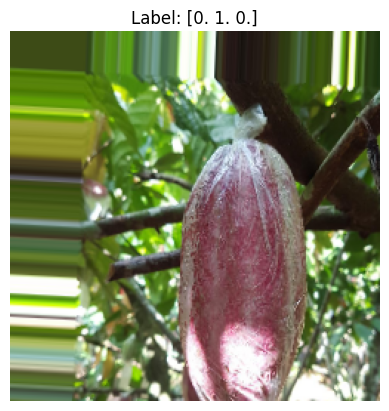

In [18]:
# Mendapatkan satu batch gambar dari train_generator
batch = train_generator.next()

# Mendapatkan array gambar dan labelnya dari batch
images = batch[0]
labels = batch[1]

# Memilih indeks acak untuk menampilkan gambar
random_index = np.random.randint(0, images.shape[0])

# Mengambil gambar dan label dengan indeks acak
image = images[random_index]
label = labels[random_index]

# Menampilkan gambar
plt.imshow(image)
plt.title(f"Label: {label}")
plt.axis('off')
plt.show()


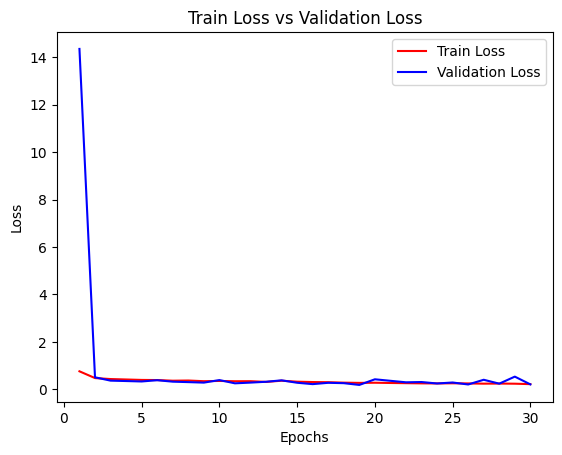

In [19]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Plot train loss dan validation loss
plt.plot(epochs, train_loss, 'r', label='Train Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Train Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

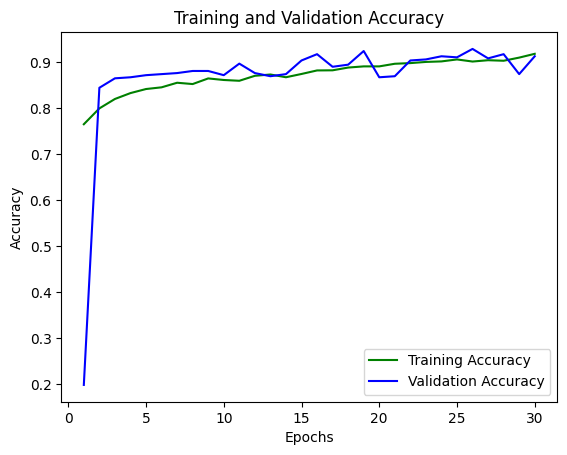

In [20]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy, 'g', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [21]:
# Evaluasi model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

model_terbaik = load_model('model_tertinggi.h5')
val_loss, val_acc = model_terbaik.evaluate(test_generator)
print('Validation Loss: ',val_loss),
print('Validation Accuracy: ',val_acc)

45/45 [==============================] - 6s 140ms/step - loss: 0.2471 - accuracy: 0.9161
Validation Loss:  0.24710699915885925
Validation Accuracy:  0.9160997867584229


In [27]:

# Fungsi untuk melakukan prediksi pada file gambar
def predict_image(file):
    img = image.load_img(file, target_size=(250, 250))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0
    prediction = model_terbaik.predict(img)
    predicted_class_index = np.argmax(prediction)
    predicted_probability = np.max(prediction)
    
    return predicted_class_index, predicted_probability

#file
uploaded_file = '/kaggle/input/test-data/test cocoa/black_pod_rot/black_pod_rot_94.jpg'

#prediksi pada file gambar
predicted_class_index,  predicted_probability = predict_image(uploaded_file)

if predicted_class_index == 0:
    hasil = 'Back Pod Rot'
elif predicted_class_index == 1:
    hasil = 'Healthy'
else:
    hasil = 'Pod Borer'

print("Hasil prediksi:", hasil)
print("Probabilitas prediksi:", predicted_probability)



1/1 [==============================] - 0s 23ms/step
Hasil prediksi: Back Pod Rot
Probabilitas prediksi: 0.9922557


In [23]:
from sklearn.metrics import classification_report

# Mengumpulkan prediksi model untuk data uji
y_pred = model_terbaik.predict(test_generator)
y_pred_labels = np.argmax(y_pred, axis=1)

# Mengambil label sebenarnya dari generator
y_true_labels = test_generator.classes

# Mendapatkan nama kelas dari generator
class_names = list(test_generator.class_indices.keys())

# Membuat classification report
report = classification_report(y_true_labels, y_pred_labels, target_names=class_names)

# Menampilkan classification report
print(report)


45/45 [==============================] - 6s 138ms/step
               precision    recall  f1-score   support

black_pod_rot       0.94      0.66      0.78        95
      healthy       0.91      0.99      0.95       335
      monilia       0.92      1.00      0.96        11

     accuracy                           0.92       441
    macro avg       0.92      0.88      0.89       441
 weighted avg       0.92      0.92      0.91       441



In [24]:
y_true_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [25]:
y_pred_labels

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,